dongyangTemperature: [25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35, 25.35

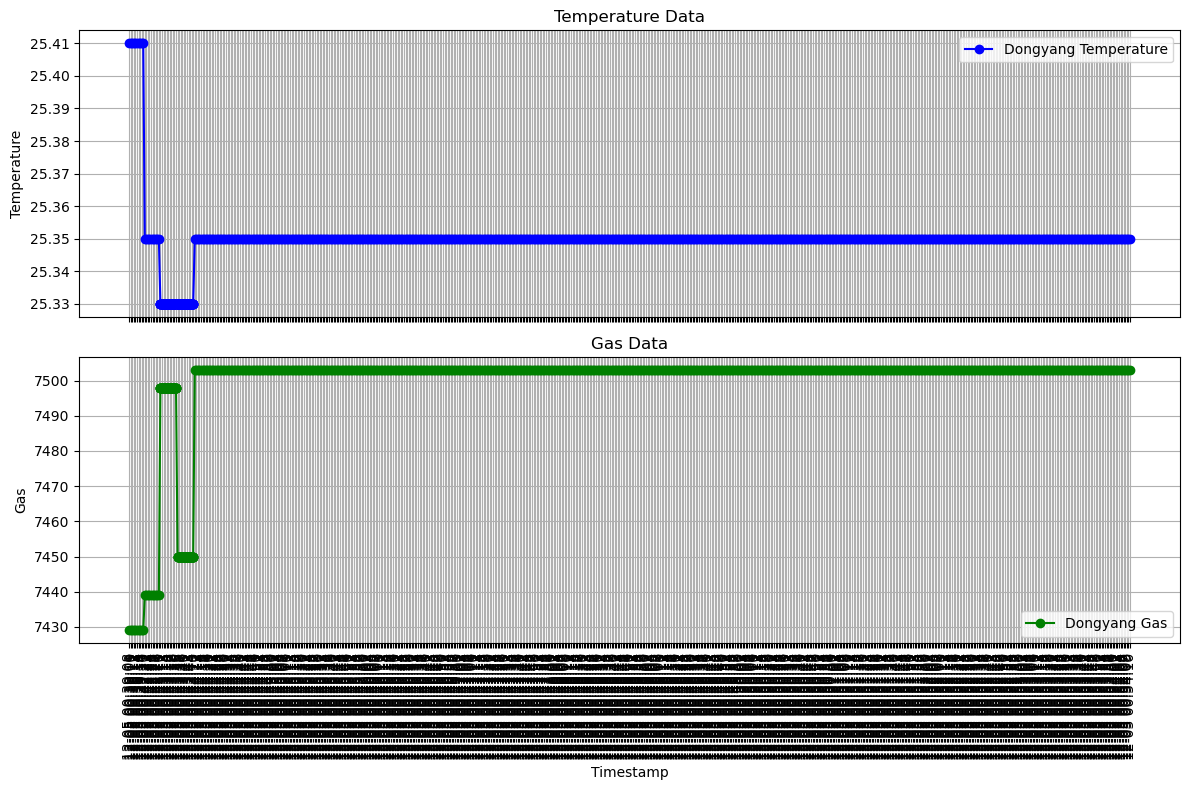

In [11]:
import paho.mqtt.subscribe as subscribe
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  # use to record the exact time
import time

dongyangtopics = ['dongyangtest1', 'dongyangtest2']
alextopics = ['alextemp', 'alexgas']

# getting data from mqtt server
dongyangdata = subscribe.simple(dongyangtopics, hostname="pf-eveoxy0ua6xhtbdyohag.cedalo.cloud", retained=False, msg_count=len(dongyangtopics))
alexdata = subscribe.simple(alextopics, hostname="pf-eveoxy0ua6xhtbdyohag.cedalo.cloud", retained=False, msg_count=len(alextopics))

# set the counting times
counts = 600
dongyangtemperature = []
dongyanggas = []
times = []
alextemperature = []
alexgas = []

# 采集数据
for n in range(counts):
    data1 = []
    for a in dongyangdata:
        data1.append(float(a.payload))
    dongyangtemperature.append(float(data1[0]))
    dongyanggas.append(float(data1[1]))
    times.append(datetime.now().strftime("%m-%d %H:%M:%S")) 
    time.sleep(1)  # the time(s) delay after one collection

    data2 = []
    for b in alexdata:
        data2.append(float(b.payload))
    alextemperature.append(float(data2[0]))
    alexgas.append(float(data2[1]))
    time.sleep(1)  

# 打印采集的数据
print("dongyangTemperature:", dongyangtemperature)
print("dongyangGas:", dongyanggas)
print("alexTemperature:", alextemperature)
print("alexGas:", alexgas)
print("Timestamps:", times)

# creat the pandas database and name the columns
df = pd.DataFrame({ 
    'timestamp': times,
    'dongyangtemperature': dongyangtemperature,
    'dongyanggas': dongyanggas,  
    'place': ['dongyangHome'] * len(times),
    'alextemperature': alextemperature,
    'alexgas': alexgas,  
    'place2': ['Joe office'] * len(times)
})
print(df)

# save the data to csv, mode="a" means appending the new data into csv rather than covering it 
df.to_csv('output.csv', mode='a', index=False, header=not pd.io.common.file_exists('output.csv'))

# read the csv data
df = pd.read_csv('output.csv')

# plot the graph
plt.figure(figsize=(12, 8))

# praph1:temperature
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['dongyangtemperature'], label='Dongyang Temperature', marker='o', color='blue')
plt.plot(df['timestamp'], df['alextemperature'], label='Alex Temperature', marker='o', color='red')
plt.title("Temperature Data")
plt.tick_params(labelbottom=False) #delte xlabel
plt.ylabel("Temperature")
plt.xticks(rotation=90)
plt.legend()
plt.grid()

# graph2:gas
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['dongyanggas'], label='Dongyang Gas', marker='o', color='green')
plt.plot(df['timestamp'], df['alexgas'], label='Alex Gas', marker='o', color='orange')
plt.title("Gas Data")
plt.xlabel("Timestamp")
plt.ylabel("Gas")
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()